<a href="https://colab.research.google.com/github/sakhawat67/Python-final-project_ASDS_09/blob/main/Bike_sharing_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import all necessary libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving day.csv to day.csv


In [ ]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['day.csv']))

In [ ]:
# Importing day.csv
biking = pd.read_csv('day.csv')

# Looking at the first five rows
biking.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Data understanding, preparation and EDA

In [ ]:
# Show the number of rows and columns

biking.shape

(730, 16)

In [ ]:
# CHeck for data types and null values

biking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
# View summary stat for numeric columns

biking.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
# Lets drop the date field (dteday) because year, month, day has been incorporated already
# Also lets drop instant column as it is a index column which have all unique values.
# We have to remove this column because it will cause a huge overfitting issue.


biking.pop('dteday')
biking.pop('instant')

biking.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


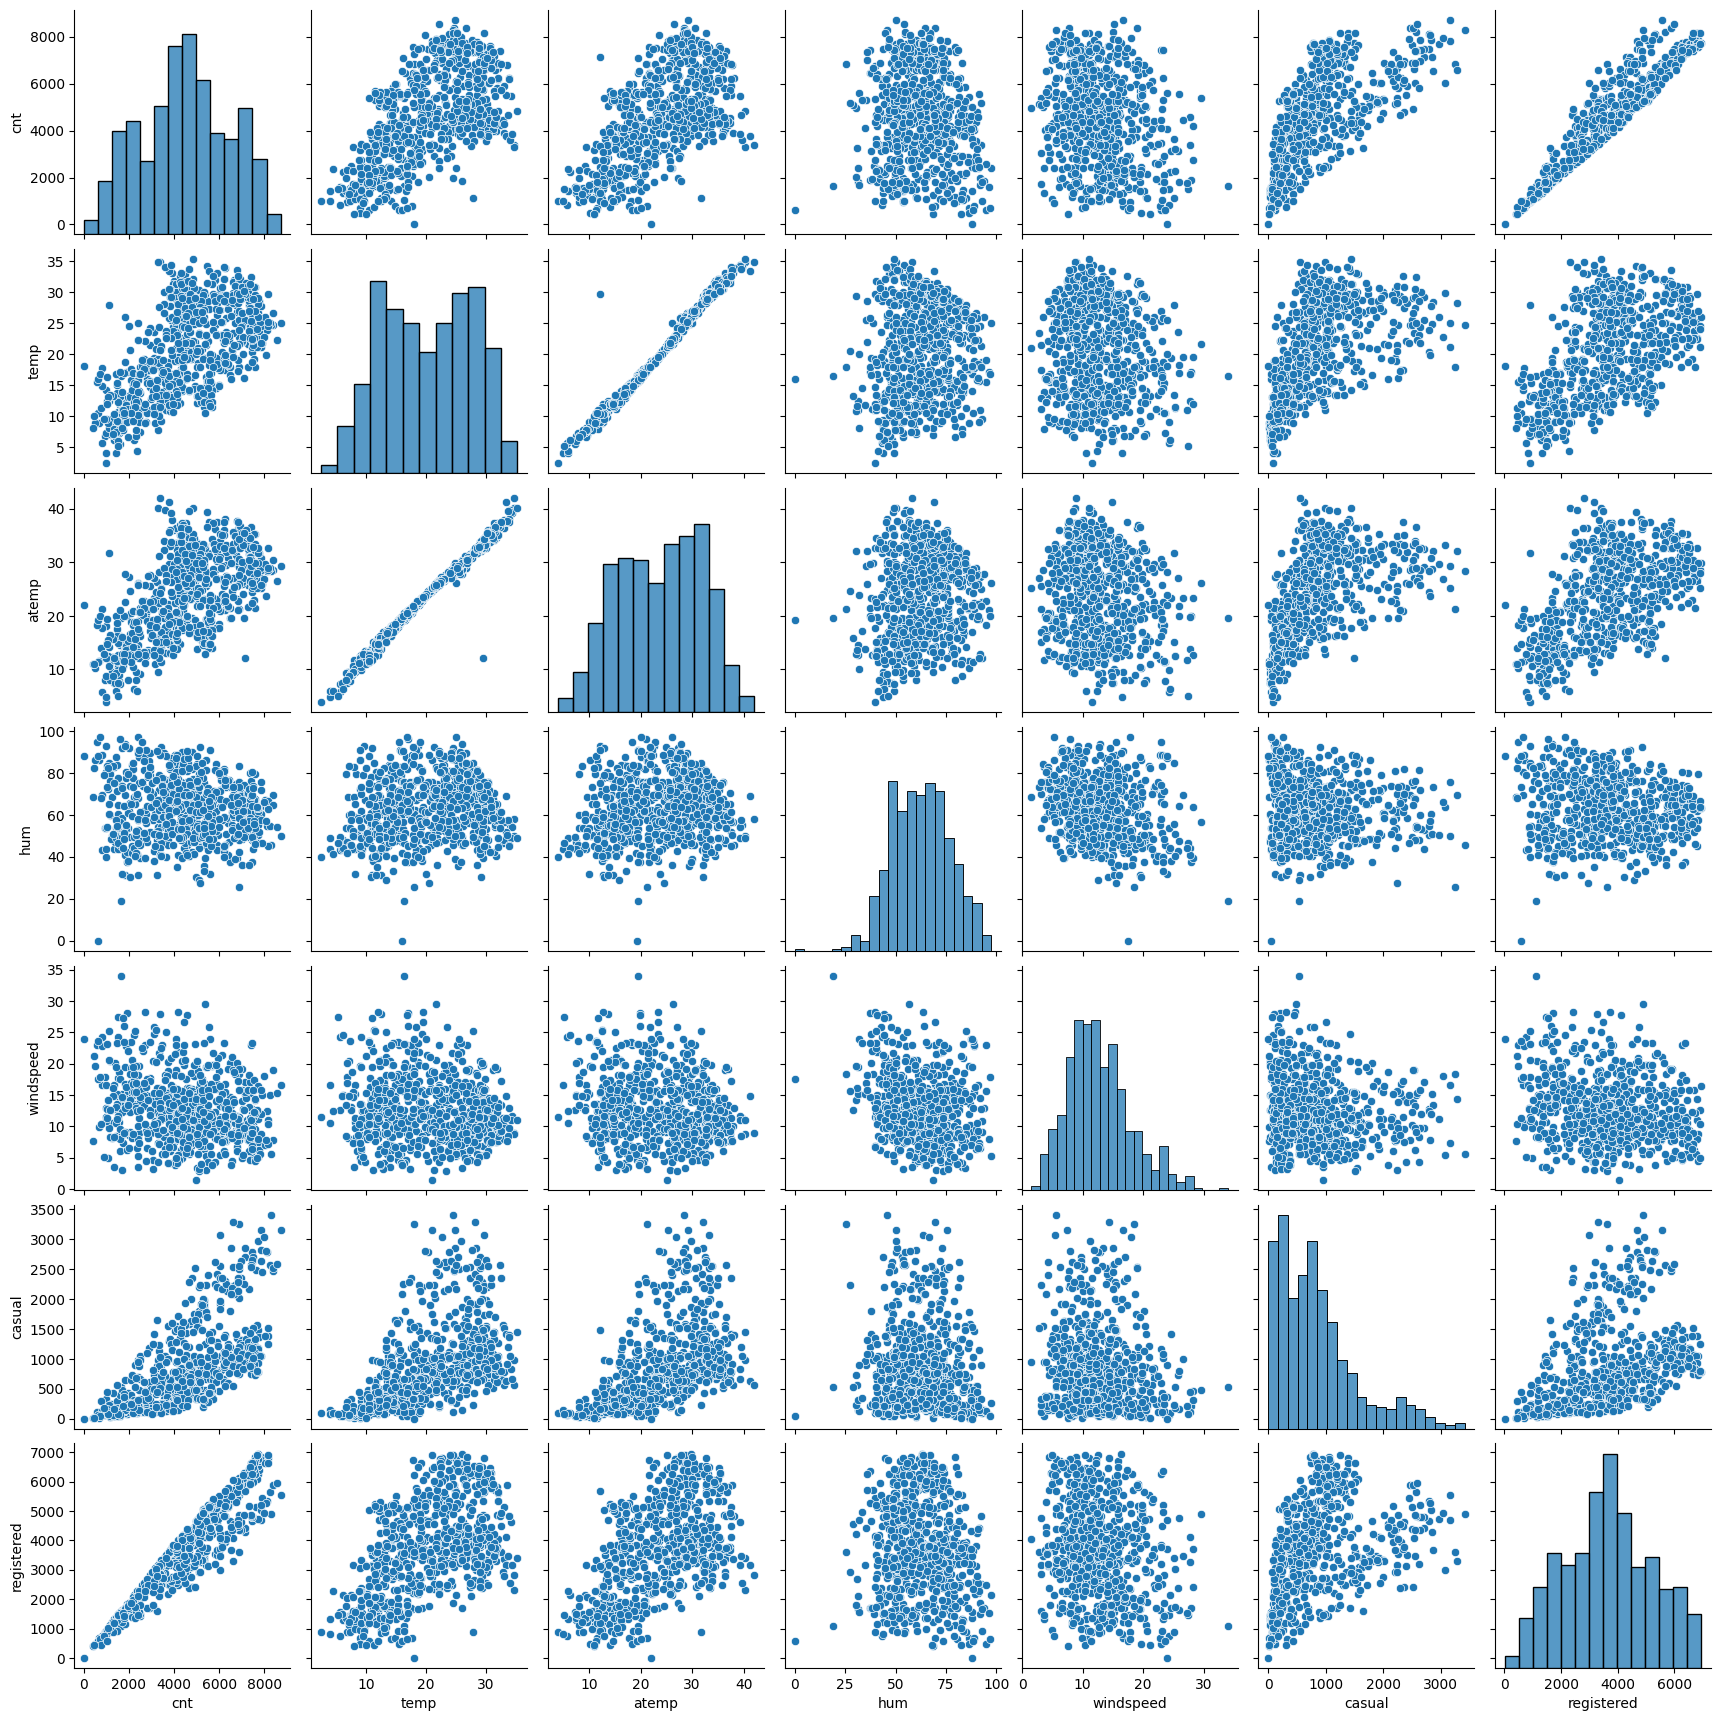

In [ ]:
# Lets make a pairplot with all numeric columns

numeric_cols = ['cnt', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']

sns.pairplot(biking[numeric_cols])

plt.show()

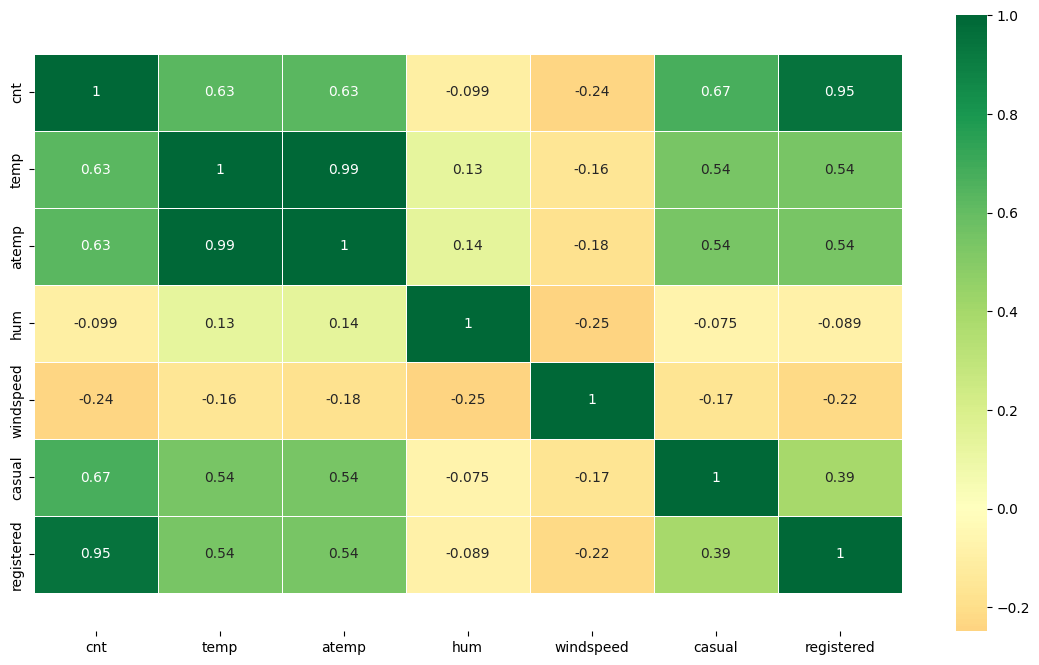

In [ ]:
# From the above pair plot we can see, temperature(temp) and feeling temperature(atemp) are almost same.

# Let's check the correlation coefficients to see which variables are highly correlated with a heatmap.

plt.figure(figsize=(14, 8))
ax = plt.subplot(1,1,1)
sns.heatmap(biking[numeric_cols].corr(), cmap='RdYlGn', annot=True, linewidths=.5, center = 0)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [ ]:
#From heat map we can see between temp and atemp there is a very high positive correlation.(~1). So we can keep only one variable.


biking.pop('atemp')

# Also from here we can see the target variable (cnt) is directly derived from casual and registered column. So, there is a high correlation 
# among target variable and these 2 columns. So, lets replace these column values with the Casual percentage and registered percentage


biking['casual'] = biking['casual'] / biking['cnt']
biking['registered'] = biking['registered'] / biking['cnt']

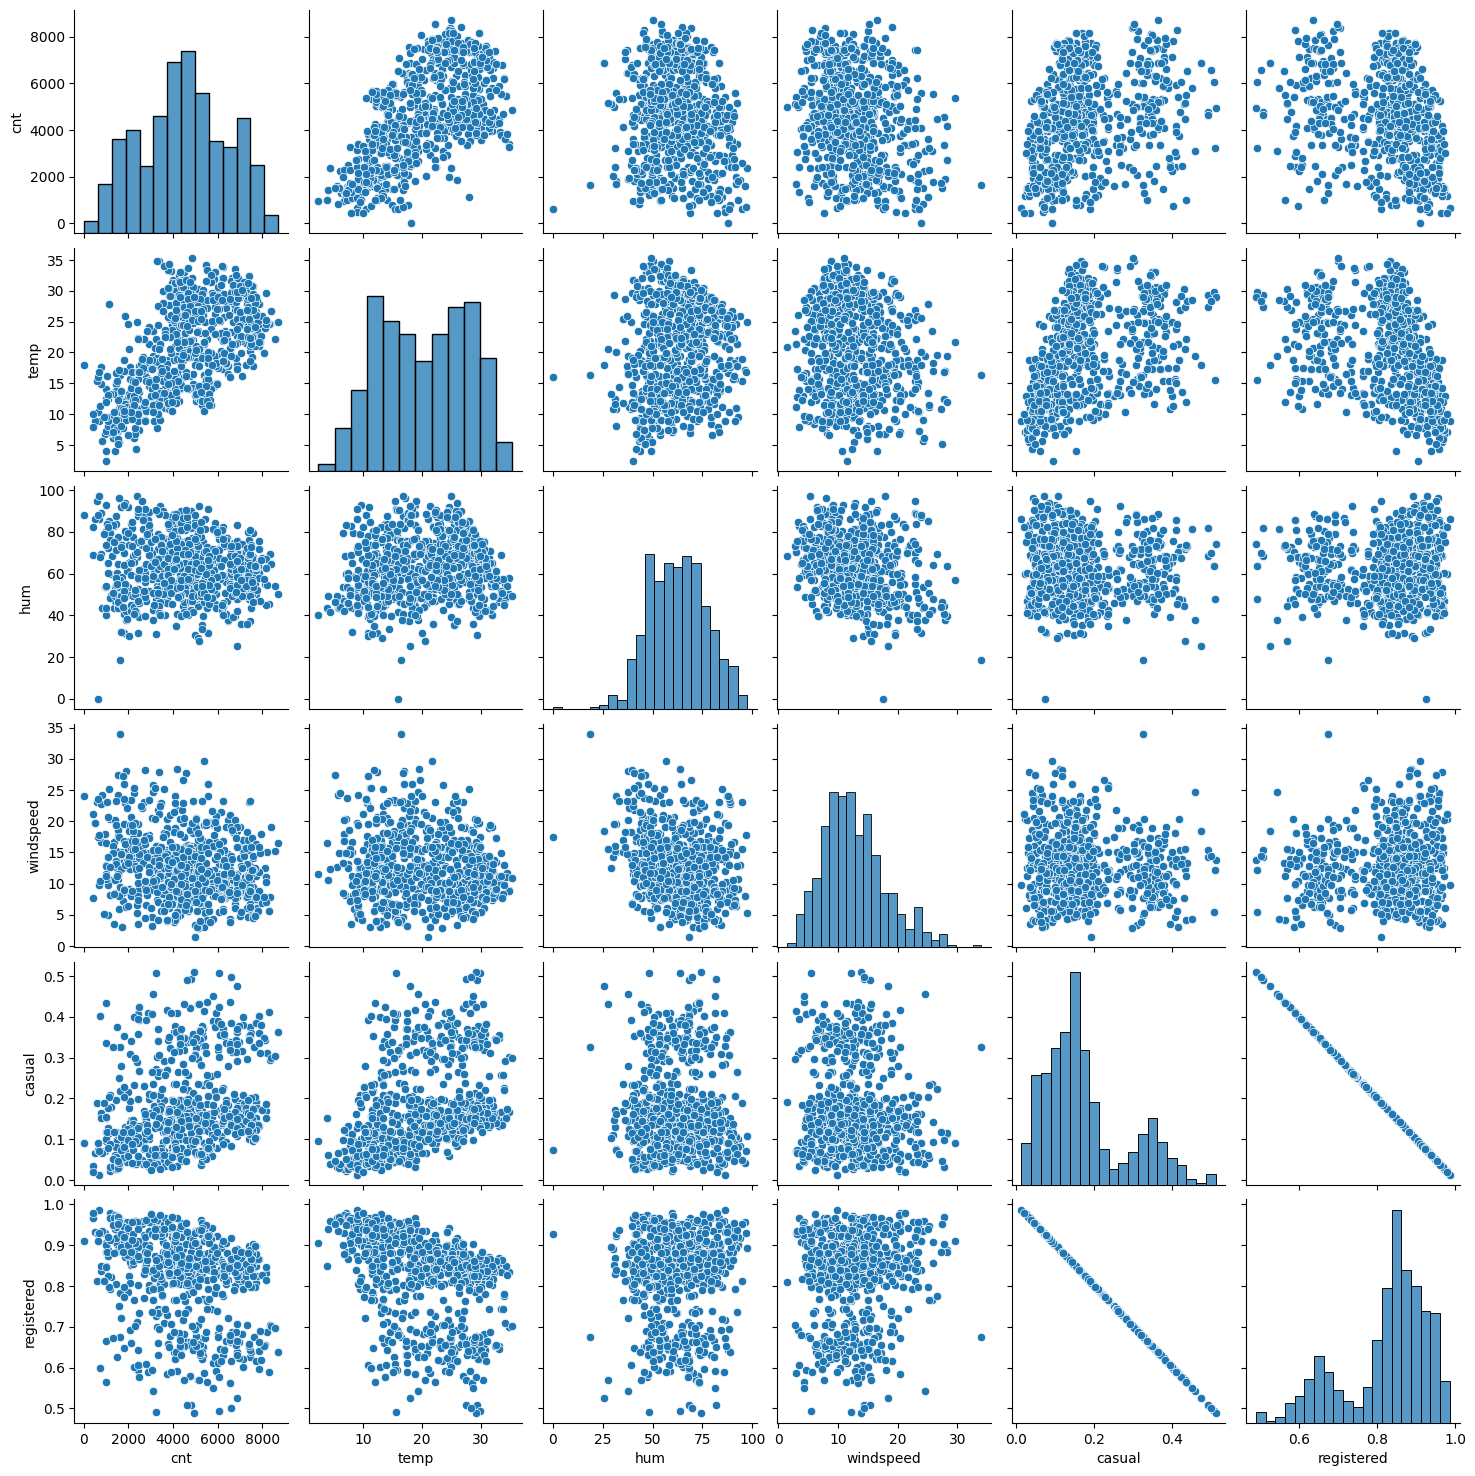

In [ ]:
# Lets make the pairplot with all numeric columns again

numeric_cols = ['cnt', 'temp', 'hum', 'windspeed', 'casual', 'registered']

sns.pairplot(biking[numeric_cols])
plt.show()

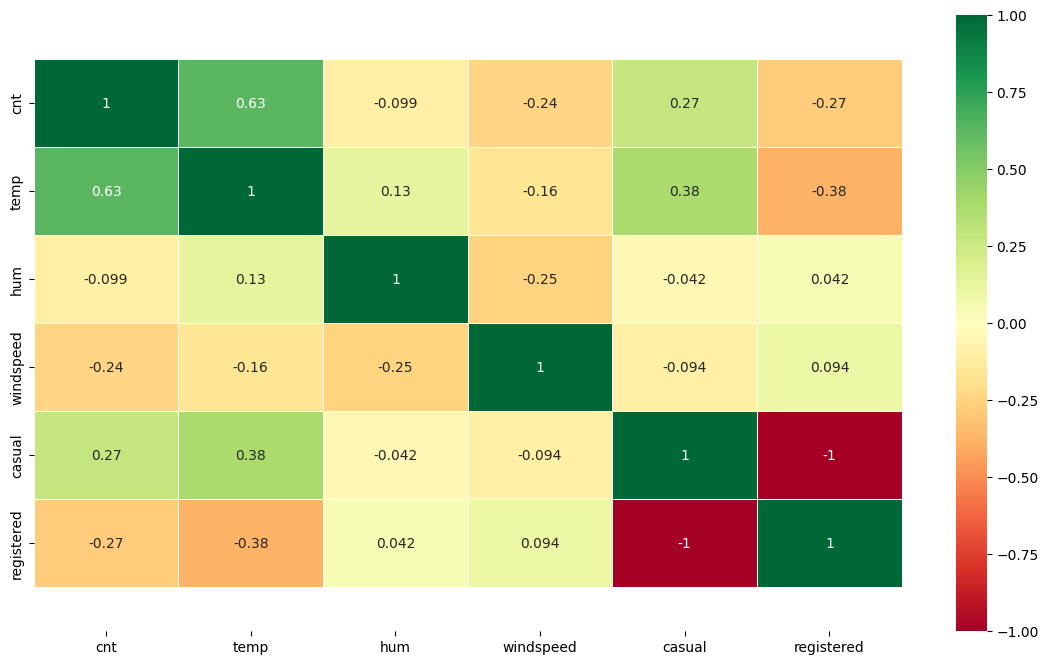

In [ ]:
# From the above pair plot we can see, casual and registered has a perfect relation.

# Let's check the correlation coefficients to see which variables are highly correlated again with a heatmap.

plt.figure(figsize=(14, 8))
ax = plt.subplot(1,1,1)
sns.heatmap(biking[numeric_cols].corr(), cmap='RdYlGn', annot=True, linewidths=.5, center = 0)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

In [ ]:
#From heat map we can see between temp and atemp there is a perfect negative correlation.(-1). So we can keep only one variable.


biking.pop('casual')

biking.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,registered,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,0.663959,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,0.836454,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,0.911045,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,0.930858,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,0.948750,1600


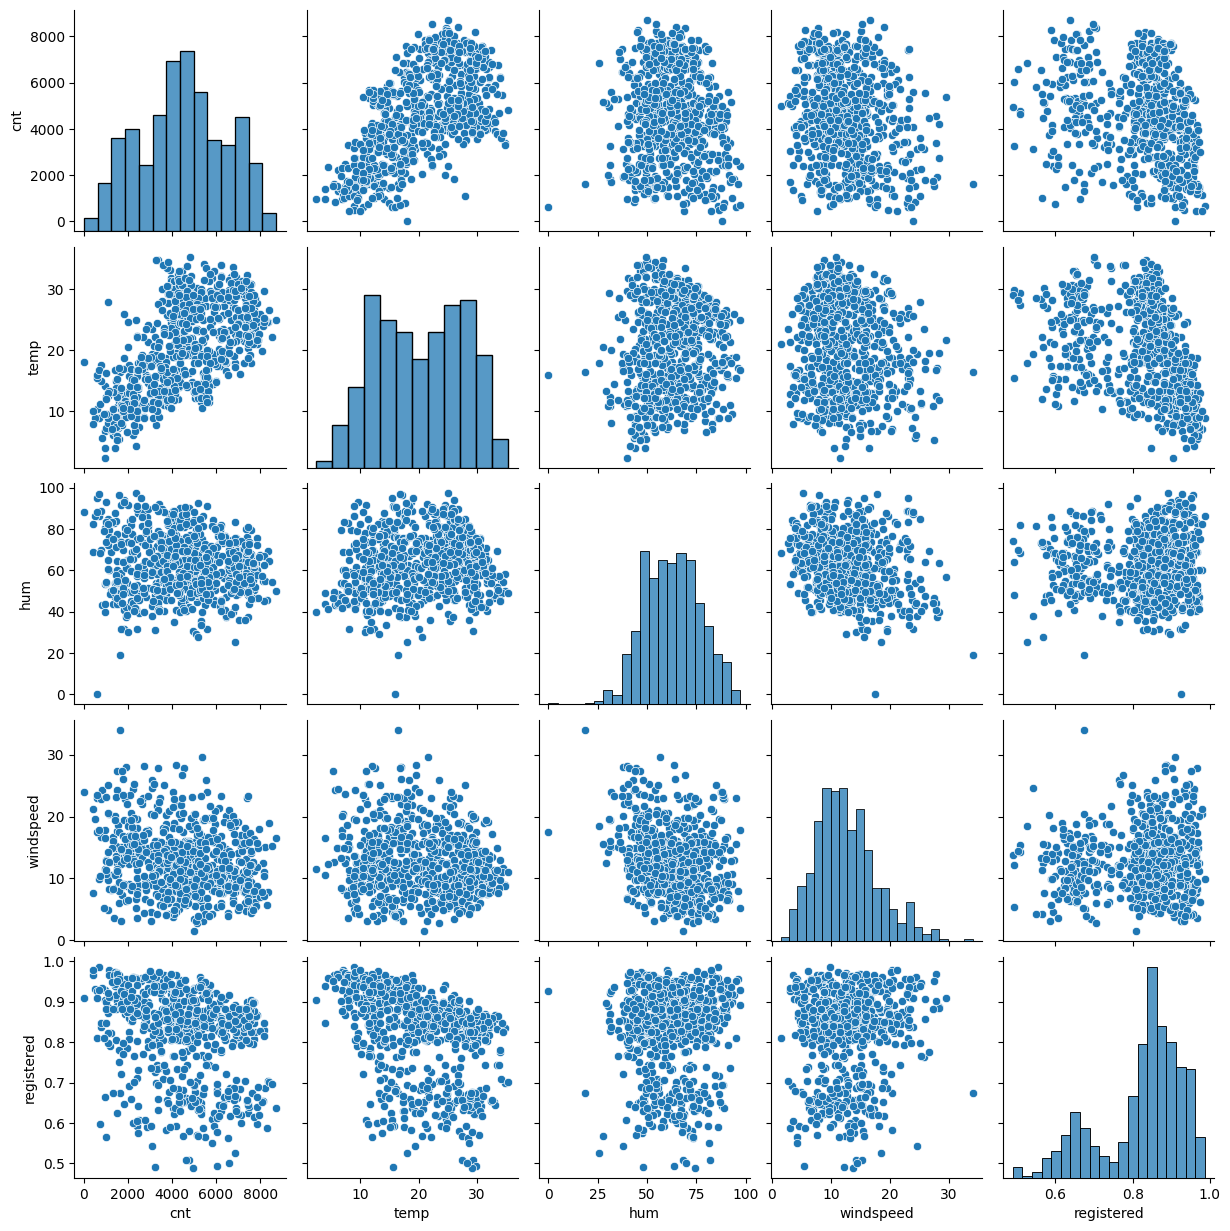

In [ ]:
# Lets make the pairplot with all numeric columns again

numeric_cols = ['cnt', 'temp', 'hum', 'windspeed', 'registered']

sns.pairplot(biking[numeric_cols])


plt.show()

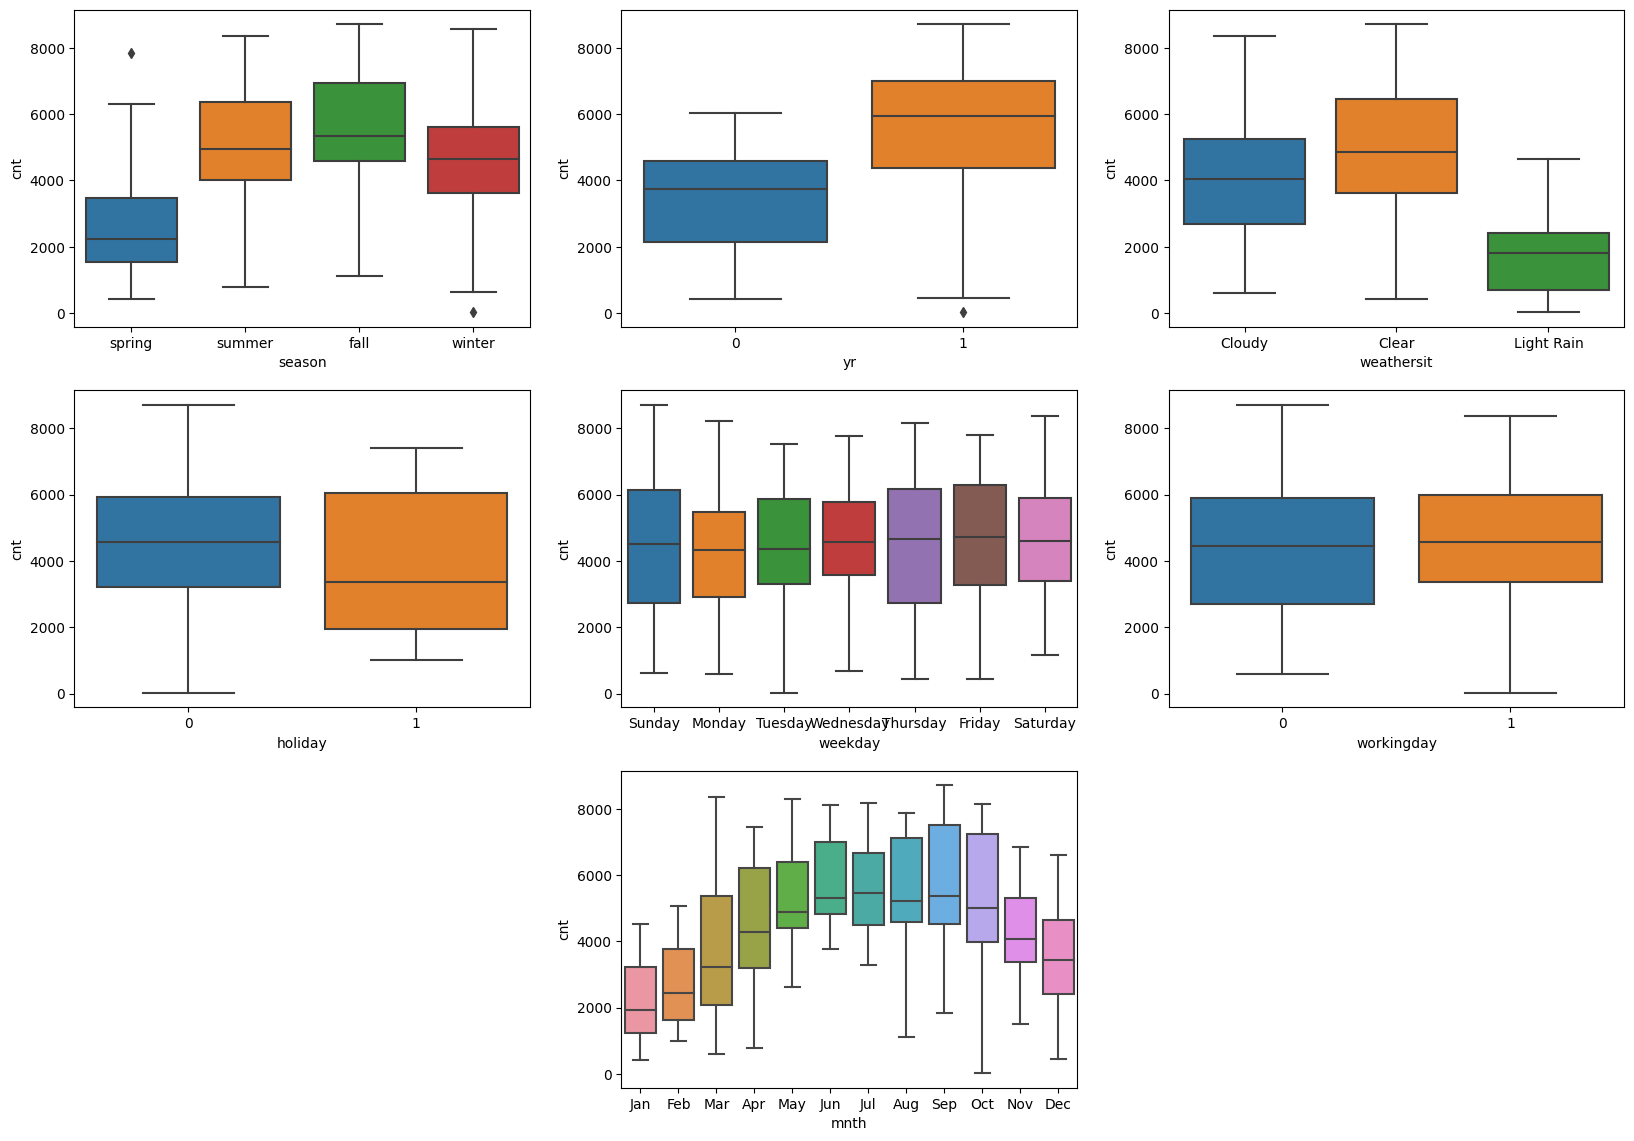

In [ ]:
# Lets work with categorical variables

# First replace the numeric values with the texts from data dictionary

biking['season'] = biking['season'].map({1 : 'spring', 2 : 'summer', 3 : 'fall', 4 : 'winter'})

biking['weathersit'] = biking['weathersit'].map({1 : 'Clear', 2 : 'Cloudy', 3 : 'Light Rain', 4 : 'Heavy Rain'})

biking['weekday'] = biking['weekday'].map({0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3 : 'Thursday',
                                          4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'})

biking['mnth'] = biking['mnth'].map({1 : 'Jan', 2 : 'Feb', 3 : 'Mar', 4 : 'Apr', 5 : 'May', 6 : 'Jun', 
                                     7 : 'Jul', 8 : 'Aug', 9 : 'Sep', 10 : 'Oct', 11 : 'Nov', 12 : 'Dec'})


plt.figure(figsize=(20, 14))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = biking)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = biking)
plt.subplot(3,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = biking)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = biking)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = biking)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = biking)
plt.subplot(3,3,8)
sns.boxplot(x = 'mnth', y = 'cnt', data = biking)


plt.show()

**Finindings from Box plots**

In summer and Fall people are taking bike ride comperatively more.

In 2019 people takes more rides than 2018.

People are less likely to take rides in bad weather i.e : rain, snowfall, etc.

In holidays people takes comperatively less rides.

For weekday column there is a very little impact on taking rides. Because the the pattern is almost same for all weekdays.

For working day column there is also little impact on taking rides. But in workingdays peole take slightly more rides .

Month has kind of simmilar effect as Season. Because from march to October people take more rides.

In [ ]:
# As yr, holiday and working day are already in binary state, so we dont need to convert them into dummy variable.

# lets convert other variables into dummy variables using pandas get dummies method.

pd.get_dummies(biking['season'], drop_first = True)


biking = pd.concat([biking, pd.get_dummies(biking['season'], drop_first = True) , 
                            pd.get_dummies(biking['weathersit'], drop_first = True) , 
                            pd.get_dummies(biking['weekday'], drop_first = True) , 
                            pd.get_dummies(biking['mnth'], drop_first = True)
                   ], axis = 1)

biking.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,spring,0,Jan,0,Sunday,0,Cloudy,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,Monday,0,Cloudy,14.902598,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,0,Tuesday,1,Clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Wednesday,1,Clear,8.200000,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,Thursday,1,Clear,9.305237,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# lets drop the original categorical columns
biking.pop('season')
biking.pop('weathersit')
biking.pop('weekday')
biking.pop('mnth')

biking.head()

,yr,holiday,workingday,temp,hum,windspeed,registered,cnt,spring,summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,14.110847,80.5833,10.749882,0.663959,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,0.836454,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,0.911045,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,0.930858,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,0.948750,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


**Model building and evaluation**

In [ ]:
# Splitting the Data into Training and Testing Sets

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(biking, train_size = 0.7, test_size = 0.3, random_state = 44)

In [ ]:
# Re-scale the numeric features using min-max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numeric_cols = ['cnt', 'temp', 'hum', 'windspeed', 'registered']

df_train[numeric_cols] = scaler.fit_transform(df_train[numeric_cols])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,registered,cnt,spring,summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
63,0,0,0,0.405012,0.746946,0.519661,0.404097,0.236424,1,0,...,0,0,0,0,0,1,0,0,0,0
658,1,0,0,0.504695,0.357184,0.302355,0.395430,0.782559,0,0,...,0,0,0,0,0,0,0,0,1,0
585,1,0,1,0.868126,0.511344,0.277150,0.694991,0.835711,0,0,...,0,0,0,0,0,0,0,0,0,0
204,0,0,0,0.960541,0.414193,0.310248,0.438352,0.412333,0,0,...,0,0,0,1,0,0,0,0,0,0
46,0,0,1,0.322889,0.236385,0.519459,0.818384,0.240796,1,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
# Lets seperate predictors (X) and target(y) variables

y_train = df_train.pop('cnt')
X_train = df_train

In [ ]:
X_train.shape

(510, 29)

In [ ]:
# Lets make the linear regression model using stats model api

# Adding a constant variable 
import statsmodels.api as sm  
X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     123.3
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          1.35e-199
Time:                        16:31:58   Log-Likelihood:                 569.63
No. Observations:                 510   AIC:                            -1081.
Df Residuals:                     481   BIC:                            -958.5
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3471      0.036      9.540      0.0

In [ ]:
# Lets Make Predictions on test data

# Applying the scaling on the test sets

numeric_cols = ['cnt', 'temp', 'hum', 'windspeed', 'registered']

df_test[numeric_cols] = scaler.transform(df_test[numeric_cols])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,registered,cnt,spring,summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
614,1,0,1,0.802708,0.673065,0.316515,0.745278,0.860792,0,0,...,0,0,0,0,0,0,0,0,0,1
206,0,0,1,0.887856,0.400232,0.388967,0.696509,0.525541,0,0,...,0,0,0,1,0,0,0,0,0,0
74,0,0,1,0.381399,0.729291,0.396206,0.730768,0.249655,1,0,...,0,0,0,0,0,1,0,0,0,0
372,1,0,0,0.346862,0.294357,0.366896,0.673293,0.391509,1,0,...,0,0,1,0,0,0,0,0,0,0
47,0,0,1,0.469390,0.350203,0.464543,0.815206,0.282214,1,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
# Lets seperate predictors (X) and target(y) variables for test set

y_test = df_test.pop('cnt')
X_test = df_test

In [ ]:
# Now let's use our model to make predictions.

# Adding a constant variable 
X_test = sm.add_constant(X_test)

# Making predictions
y_pred = lm.predict(X_test)


# lets Make data frame with predicted value and actual value

Pred_Actual = pd.DataFrame({'Target_Actual' : y_test, 'Target_Prediction' : y_pred})

Pred_Actual

,Target_Actual,Target_Prediction
614,0.860792,0.836876
206,0.525541,0.543557
74,0.249655,0.242528
372,0.391509,0.410912
47,0.282214,0.303336
...,...,...
523,0.887483,0.824664
130,0.478601,0.517288
506,0.696157,0.718269
113,0.479636,0.373184


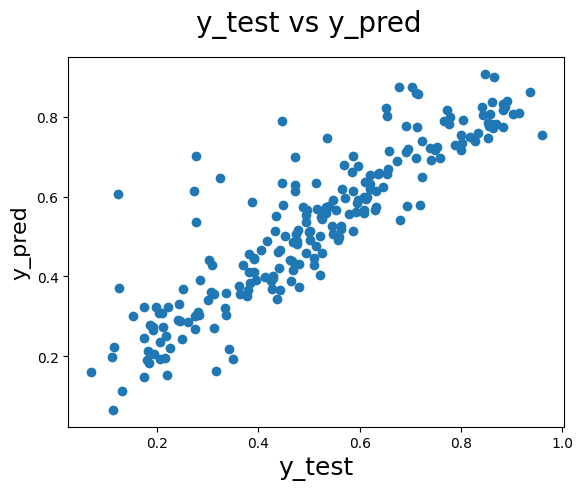

In [ ]:
# Model Evaluation

# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

plt.show()

In [ ]:
# From the spred we can see the predicted value and original value are more of a linear relation.
# Lets calculated the r-squared value, MAE, MSE, RMSE


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred, squared=True)
RMSE = mean_squared_error(y_test,y_pred, squared=False)
r2 = r2_score(y_test,y_pred)

print("MAE : ", MAE)
print("MSE : ", MSE)
print("RMSE : ", RMSE)
print("r2 : ", r2)

MAE :  0.06861646397856327
MSE :  0.009582437966601702
RMSE :  0.09788992780976857
r2 :  0.7899086420773243
